In [ ]:
# Problem Statement :
# The goal is to build a predictive model that estimate the monthly charges of a new
# customer based on the services they are attaining and other relevent customer information

In [2]:
# step-1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# step-2
df = pd.read_csv('/content/Churn_dataset.csv')

In [5]:
# step-3
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
 # EDA ---> To explore the data / to extract important features from the data
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# The TotalCharges column is incorrectly defined
# Excaully it is float but it way defined as object
# Hence we to handle it

In [ ]:
# df['TotalCharges'] = df['Totalcharges'].astype('float64')
# Its a basic thing and what if our column contain unique values then it need to be handled in proper way , Hence following method is used

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
# the to_numeric is used to convert the values into numeric and
#the coerce --> if any value cannot be converted into number the coerce converts it into NAN(not a number)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Data Cleaning
#  null values ,
# duplicate values ,
# outliers

In [9]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Null values are in Totalcharges and we need to drop them

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [12]:
# Now let's check duplicates
df.duplicated().sum()

np.int64(0)

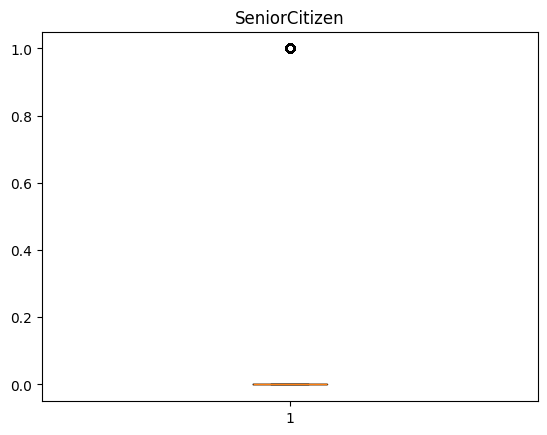

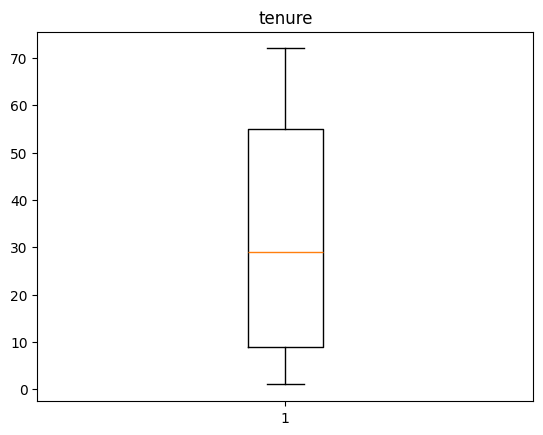

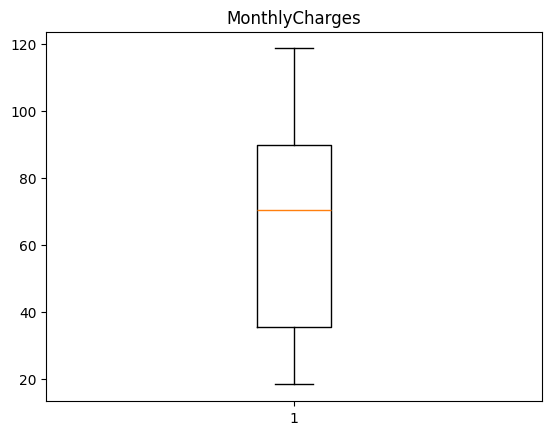

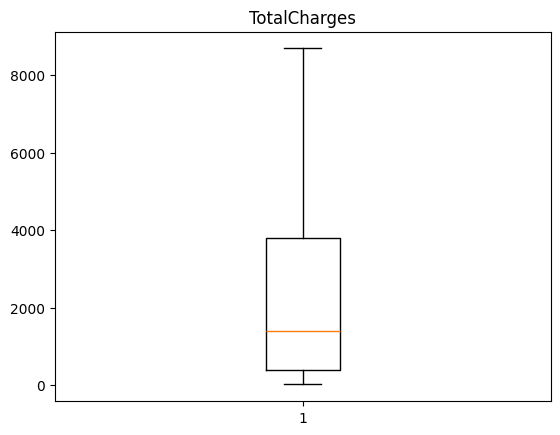

In [13]:
# Now let's check for outliers (outlier analysis)
for i in df.columns:
  if df[i].dtypes != 'object':
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()   # no need for outlier removal process hence we don't have the ouliers

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
# Le's drop the columns that are not required for further analysis
df = df.drop(['customerID'],axis=1) # [ rows-->axis=0,colums-->axis=1 ]

In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
# Data preprocessing
  # 1. Data encoding (label encoding)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()  # creating a object for label encoder

In [18]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])

In [19]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [20]:
# colleration matrix
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


<Axes: >

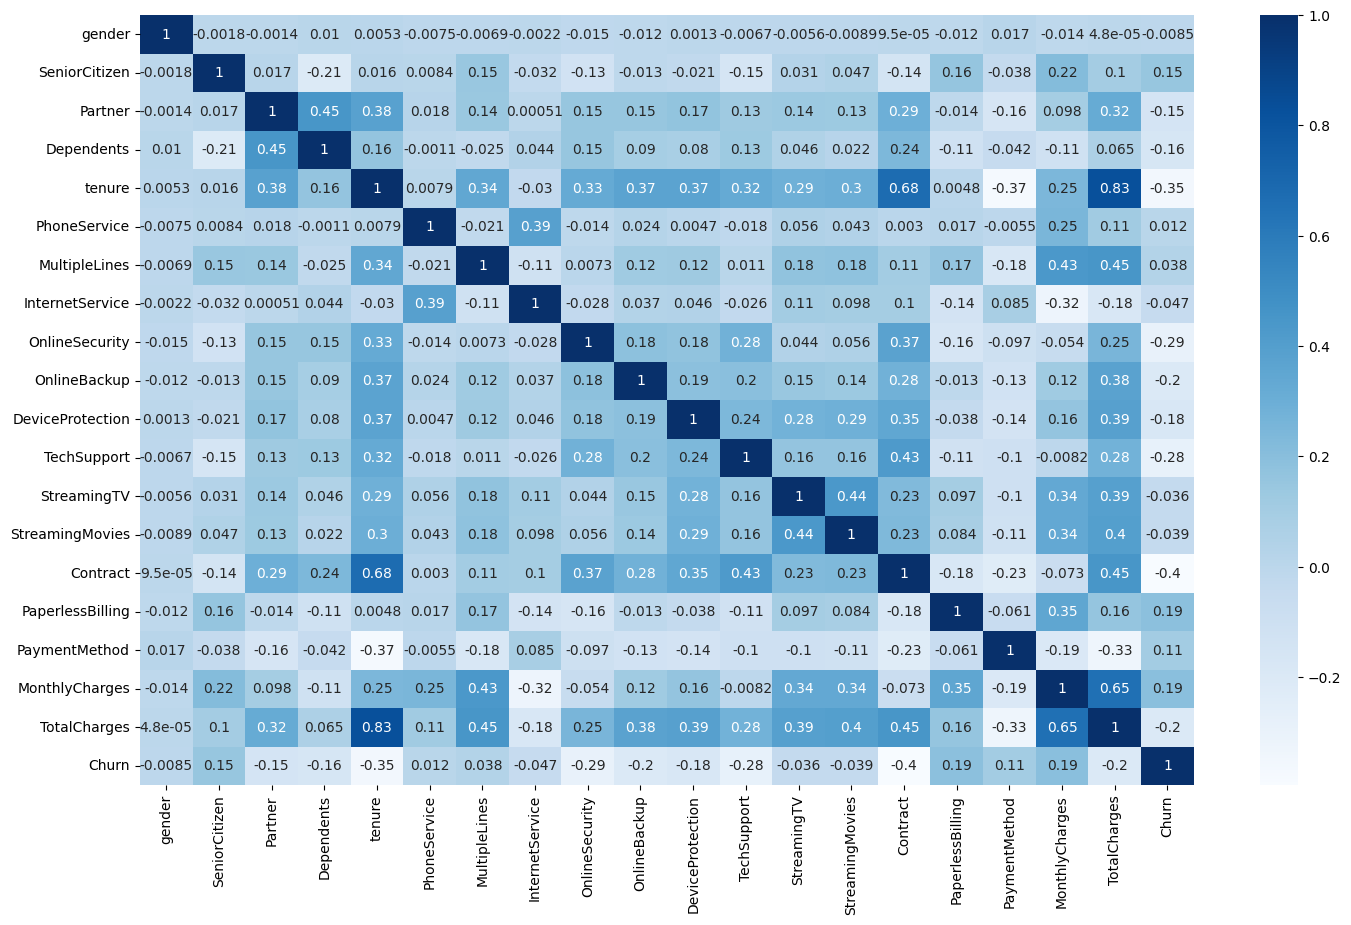

In [21]:
# Heap map visulization
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),cmap='Blues',annot= True)

In [22]:
# Model prediction
# spliting the data as dependent and independant values

In [23]:
x= df.iloc[ : , : -1] #[first rows , columns except last one ]

In [24]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [25]:
y = df['Churn']

In [26]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [27]:
# Spliting the data into training and Testing

from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.70 , random_state=42)

In [29]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3946,0,0,0,0,9,0,1,0,2,0,2,2,2,2,0,0,3,58.50,539.85
3394,1,0,0,0,26,1,2,0,2,2,0,0,0,0,1,0,2,61.55,1581.95
1635,0,0,0,0,3,1,0,0,0,0,2,0,2,2,1,1,2,69.95,220.45
4088,1,0,0,0,7,1,2,1,0,0,0,0,0,0,0,0,2,73.60,520.00
1886,1,0,1,1,67,1,0,0,2,0,2,2,0,0,2,1,0,60.40,3953.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,1,0,0,0,3,1,2,0,0,0,0,0,0,0,0,0,0,50.40,137.25
5199,0,0,0,0,51,1,2,1,0,2,2,2,2,2,1,1,2,111.50,5703.25
5235,1,0,0,0,9,1,2,1,2,0,0,0,0,0,0,1,2,81.15,784.45
5399,0,0,0,0,50,1,0,2,1,1,1,1,1,1,1,0,0,19.75,989.05


In [30]:
x_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2481,1,1,1,0,61,1,2,2,1,1,1,1,1,1,2,0,0,25.00,1501.75
6784,0,0,0,0,19,1,2,2,1,1,1,1,1,1,0,0,0,24.70,465.85
6125,1,0,1,0,13,1,2,1,0,0,2,0,2,2,0,1,1,102.25,1359.00
3052,1,0,1,0,37,1,2,0,2,0,0,0,0,0,0,1,3,55.05,2030.75
4099,0,0,0,0,6,0,1,0,2,0,0,0,0,0,0,0,0,29.45,161.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,1,0,1,1,64,1,0,1,2,2,0,0,0,0,0,0,2,81.05,5135.35
6747,0,0,1,0,52,0,1,0,2,0,2,0,0,0,1,0,3,35.45,1958.95
1700,1,0,0,0,47,1,0,2,1,1,1,1,1,1,2,0,0,20.45,943.00
1099,1,0,1,1,5,1,2,0,0,0,0,2,0,0,0,1,3,55.70,259.40


In [31]:
y_test

,Churn
2481,0
6784,0
6125,1
3052,0
4099,0
...,...
2763,0
6747,0
1700,0
1099,0


In [32]:
# Model Implementation

from sklearn.linear_model import LogisticRegression

In [33]:
log_model= LogisticRegression()

In [35]:
# Train the model
log_model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
# Testing the model
log_pred = log_model.predict(x_test)

In [37]:
# Evalutaing the model

from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test,log_pred)

0.7928909952606635

In [52]:
# Acutal vs Predicted
predicted_df = pd.DataFrame({'Actual': y_test ,'predicted' : log_pred})
print(predicted_df)

      Actual  predicted
2481       0          0
6784       0          0
6125       1          1
3052       0          0
4099       0          0
...      ...        ...
2763       0          0
6747       0          0
1700       0          0
1099       0          0
4720       0          0

[2110 rows x 2 columns]


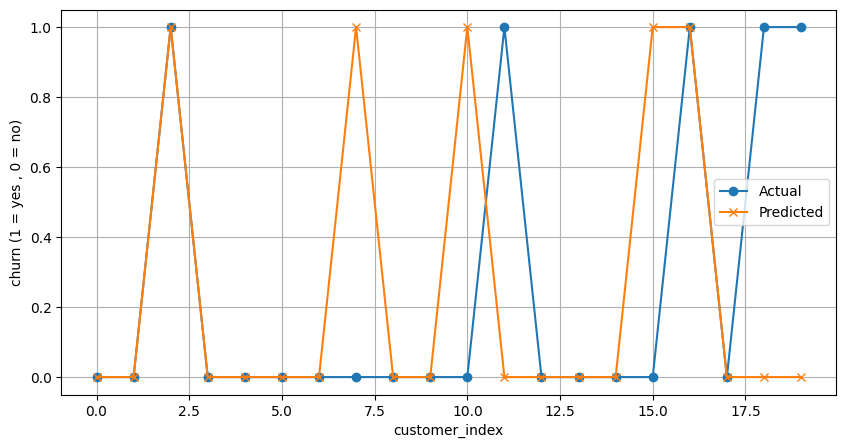

In [55]:
# Let's plot
plt.figure(figsize=(10,5))
plt.plot(y_test[: 20].values , label='Actual', marker='o')
plt.plot(log_pred[:20], label='Predicted',marker='x')
plt.xlabel('customer_index')
plt.ylabel('churn (1 = yes , 0 = no)')
plt.legend()
plt.grid()
plt.show()

In [43]:
# Let's check for other alogorithms (Working on multiple algorithms)

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()  # object Created

In [47]:
dt_model.fit(x_train,y_train) # the model learns patterns/relationships
dt_pred = dt_model.predict(x_test) # to make predictions
accuracy_score(y_test,dt_pred)    # measuring the accuaracy

0.7170616113744076

In [53]:
# Actual vs predicted
predicted_df = pd.DataFrame({'Actual': y_test ,'predicted' : dt_pred})
print(predicted_df)

      Actual  predicted
2481       0          0
6784       0          0
6125       1          1
3052       0          0
4099       0          1
...      ...        ...
2763       0          0
6747       0          0
1700       0          0
1099       0          1
4720       0          0

[2110 rows x 2 columns]


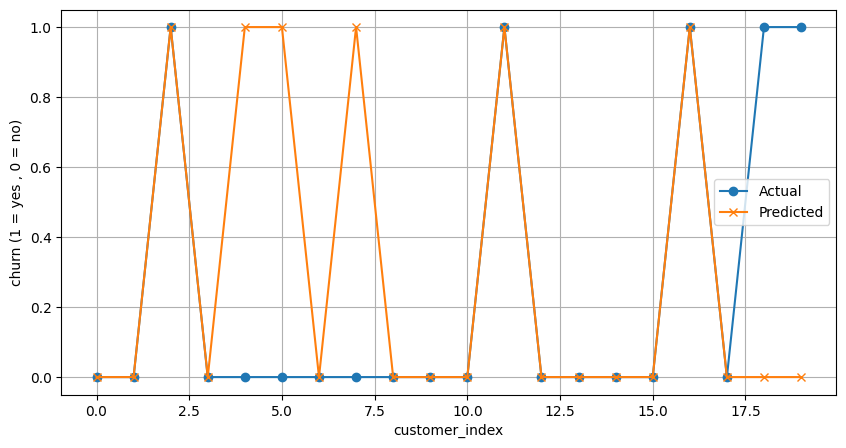

In [54]:
# Let's plot
plt.figure(figsize=(10,5))
plt.plot(y_test[: 20].values , label='Actual', marker='o')
plt.plot(dt_pred[:20], label='Predicted',marker='x')
plt.xlabel('customer_index')
plt.ylabel('churn (1 = yes , 0 = no)')
plt.legend()
plt.grid()
plt.show()

In [48]:
# Accuracy testing with RandomForest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [49]:
rf_model.fit(x_train,y_train)
rf_pred = rf_model.predict(x_test)
accuracy_score(y_test,rf_pred)

0.7824644549763033

In [50]:
# Hence Logictic Rgression is best fit for the data

In [57]:
# Let's see the importantant features
feature_important = dt_model.feature_importances_ #it will extract the important features
feature_name = x_train.columns  # extract all the columns

In [61]:
# let's print the important features

important_df = pd.DataFrame({
    'Feature_Name' : feature_name,
    'Importance' : feature_important
}).sort_values(by= 'Importance', ascending=False)
print('Feature Importance')
print(important_df)

Feature Importance
        Feature_Name  Importance
17    MonthlyCharges    0.234949
18      TotalCharges    0.188618
14          Contract    0.176816
4             tenure    0.132353
16     PaymentMethod    0.050942
8     OnlineSecurity    0.023450
2            Partner    0.021451
1      SeniorCitizen    0.020017
11       TechSupport    0.019637
3         Dependents    0.019227
0             gender    0.018844
15  PaperlessBilling    0.018702
10  DeviceProtection    0.016623
9       OnlineBackup    0.015655
6      MultipleLines    0.014329
13   StreamingMovies    0.014113
12       StreamingTV    0.006152
7    InternetService    0.005009
5       PhoneService    0.003114
